## Um problema maior, do tamanho de um Návio!

Que tal pegarmos uma base de dados da vida real e trabalhar um pouco mais com algoritmos de classificação?

Dessa vez, vamos usar um base classicamente usada para aprender aprendizado de maquina: A `Titanic`. Essa base descreve, para cada passageiro no histórico návio, se ele sobreviveu ou não aquela tragédia. Dentro das nossas `features` temos informações numéricas como idade e número de parentes a bordo, catégoricas como sexo e portão de embarque e até colunas que descrevem em qual cabine aquele passageiro estava dormindo!

### Questão 1

Nossa missão aqui é predizer quando um determinado passageiro sobreviveu ou não, sendo `1` sobreviveu e `0` não sobreviveu. Mas antes vamos tomar um tempo para estudar a base! Vamos usa-la bastante nesse exercício então precisamos nos familiarizar.

Carregue a base `dataset/titanic_test.csv` e `dataset/titanic_train.csv`. Repare que como nossos dados estão separados em arquivos não iremos precisar usar o train_test_split!

Através do arquivo de treino (`dataset/titanic_train.csv`) Visualize graficamente cada coluna, suas distribuições, sua cardinalidade, etc...

Talvez você irá precisar de um catálogo explicando o que cada coluna que pode ser [encontrado aqui](https://www.kaggle.com/c/titanic/data).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Questão 1
#Escreva aqui o comando para importar os dados do arquivo titanic_train.csv para o seu dataframe usando pandas
#lembra como ler(read em inglês) o arquivo?
from google.colab import drive
drive.mount('/content/drive')

df_treinar = pd.read_csv('/content/drive/MyDrive/ArquivosColab/titanic_train.csv')

df_treinar.head()

Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Questão 2
# Agora de uma olhada nos dados para se familizarizar com as colunas númericas. Dica: descreva os dados? (describe)
df_treinar.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [4]:
# verificando dataframe

df_treinar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
## Questão 3
#sera que temos dados nulos? se sim, quantos? (isnull com um sum)
# checando se existem dados faltantes

df_treinar.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

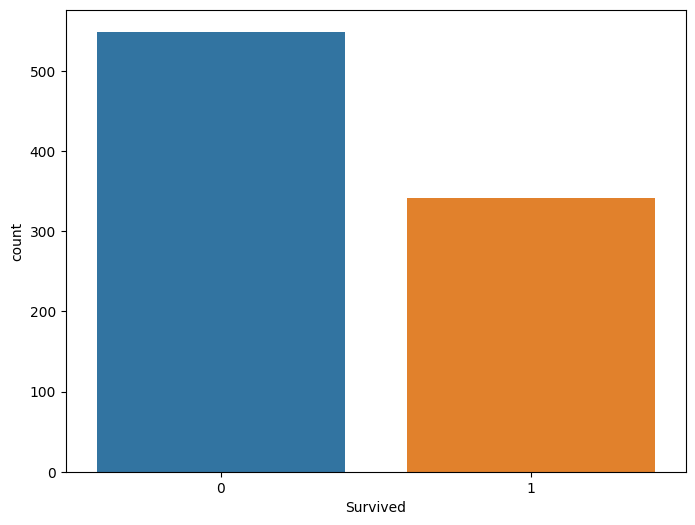

In [6]:
#Questão 4
#plot um gráfico contando (count) a quantidade de pessoas que sobreviveram. Essa informação está na coluna `Survived`

plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=df_treinar)

<Axes: xlabel='Sex', ylabel='count'>

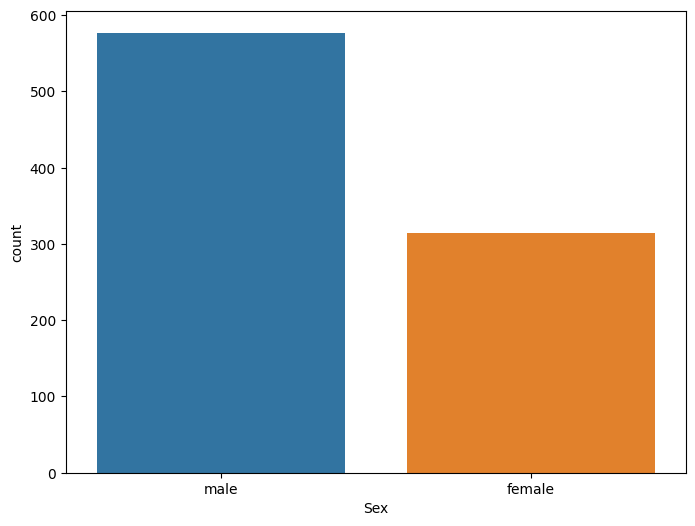

In [7]:
#Questão 4
#plot um gráfico contando (count) a quantidade de pessoas por gênero. Essa informação está na coluna `Sex`

plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data=df_treinar)

<Axes: xlabel='Survived', ylabel='count'>

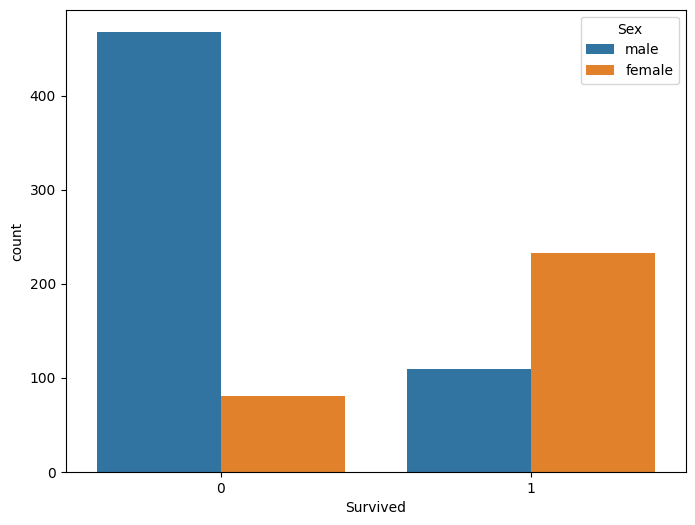

In [8]:
#Questão 6
#plot um gráfico contando (count) a quantidade de pessoas que sobreviveram por sexo. Essas informações estão nas colunas `Survived` e `Sex`

plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=df_treinar, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

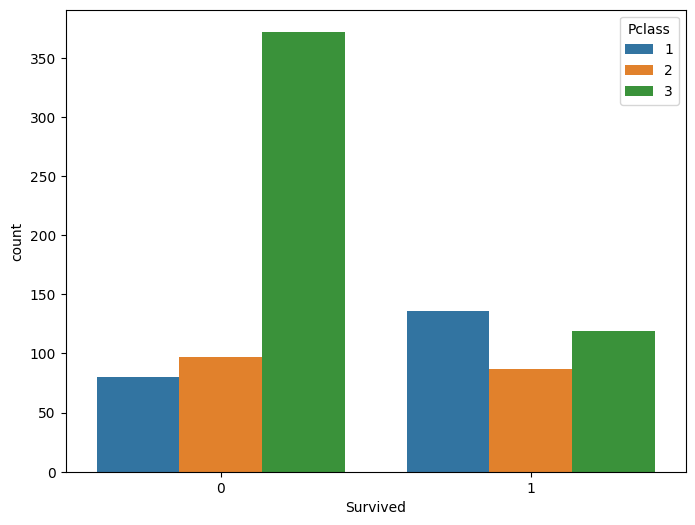

In [9]:
#Questão 7
#agora veja como são os sobreviventes de acordo com as suas classes. Essa informação está na coluna `Pclass`

plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=df_treinar, hue='Pclass')

<Axes: xlabel='Survived', ylabel='Age'>

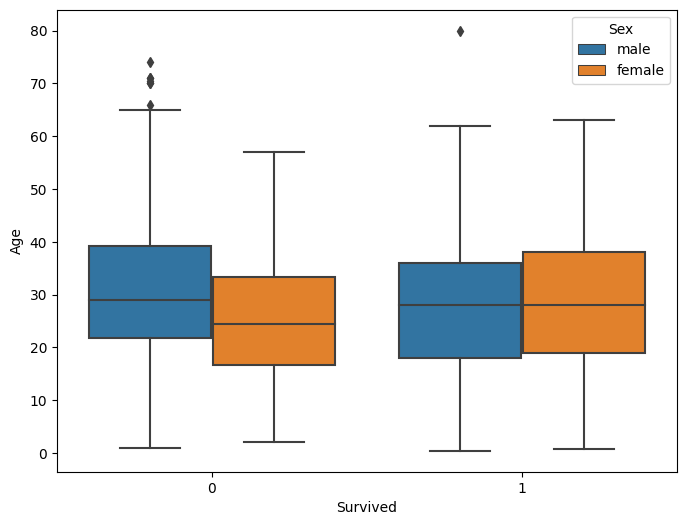

In [10]:
#Questão 8
#Que tal agora fazemos um boxplot para juntarmos em um mesmo gráfico quem sobreviveu, seu gênero e sua idade?
#dica1 plt.figure(figsize=(8,6))
#dica 2 x='Survived', y= 'Age', hue='Sex'

plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y= 'Age', hue='Sex', data=df_treinar)

<Axes: xlabel='Pclass', ylabel='Fare'>

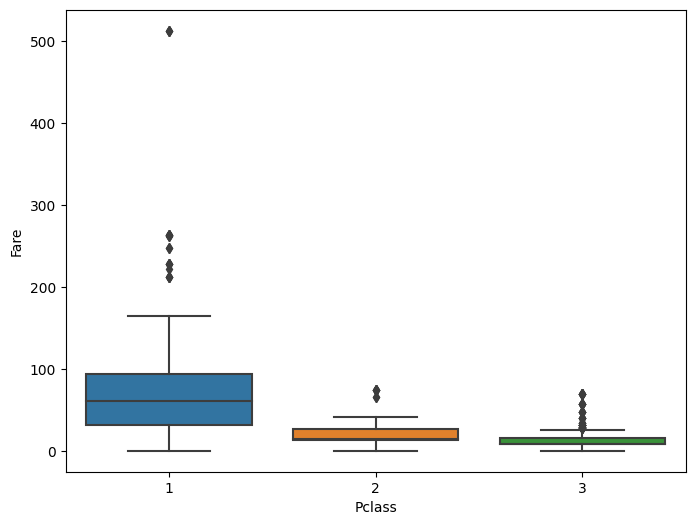

In [11]:
#Questão 9
#Como seria um boxplot da classe `Pclass` pela tarifa `Fare`?
#dica1 plt.figure(figsize=(8,6))

plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y= 'Fare', data=df_treinar)

## Usando Regressão Logística em problemas reais

A regressão logística é um algoritmo de classificação binária, porém ele usa os mesmos princípios da regressão linear para resolver seus problemas.

Logo, nossa entrada `X` precisa ser uma sequência de colunas numéricas e `y` uma coluna única binária.

Olhando para a base do Titanic, é notavel que nosso `y` esta num formato adequado, porém, muitas colunas promissoras para nosso modelo não estão, como `gender`, `Pclass` e `Embarked`.

Para torna-las númericas, precisamos **transforma-las em mais colunas e torna-las boolenas**. Isso porque não sabemos se elas tem alguma correlação, logo seria errado colocar por exemplo `Male = 1` e `Female = 0`. Para esse processo usamos um método de pré-processamento chamada **one-hot enconding**. Ainda vamos aprofundar nesse conceito na próxima aula. Por enquanto será suficiente apenas executar os comandos abaixo.

### OneHotEnconding

Rode o comando do scikit learn de OneHotEnconding nas colunas `gender`, `Pclass` e `Embarked`. Se quiser entender melhor o que está acontecendo, você acha a [documentação oficial](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) mas sinta-se livre para encontrar suas próprias fontes.

In [12]:
from sklearn.preprocessing import OneHotEncoder

df_treinar = pd.read_csv('/content/drive/MyDrive/ArquivosColab/titanic_train.csv')

encoder = OneHotEncoder(sparse=False)

train_X_encoded = pd.DataFrame(encoder.fit_transform(df_treinar[['Sex', 'Pclass', 'Embarked']]))
train_X_encoded.columns = encoder.get_feature_names_out(['Sex', 'Pclass', 'Embarked'])
df_treinar.drop(['Sex', 'Pclass', 'Embarked'] ,axis=1, inplace=True)
df_treinar = pd.concat([df_treinar, train_X_encoded ], axis=1)

df_treinar #novo dataframe após rodarmos o OneHotEncoder. Você consegue ver o que mudou?

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### Normalizando

Note que agora, todas as nossas colunas categóricas relevantes tem suas contrapartes categóricas (inclusive mais de uma).

Esse processo que estamos fazendo se chama _pré-processamento_ e está centrado em tornar nossas bases adequadas para o algoritmo que pretendemos usar.

Vamos então entender um novo processo de pré-processamento, agora para variáveis númericas. Uma boa prática que facilita o trabalho do nosso modelo é **normalizarmos variáveis numéricas**. Isto é, deixa-las todas com um `range` semelhante.

Para isso podemos usar o `StandardScaler`, da biblioteca sklearn, para aplicarmos essas operações em nossa base, vamos aplica-las nas colunas `Age`, `SibSp` e `Fare`.

Lembrando que para entender como usa você deve pesquisar por referência e exemplos na internet, e nunca se esqueça de olhar a [documentação oficial](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

Novamente, não se preocupe tanto com esse passo. Os comandos a serem executados estão logo abaixo. Substitua as colunas originais pelo resultado alcançado. Mas tente entender o que está acontecendo

In [13]:
from sklearn.preprocessing import StandardScaler
features = ['Age', 'SibSp', 'Fare']
ss = StandardScaler()
ss.fit(df_treinar[features])
df_treinar[features] = ss.transform(df_treinar[features])
df_treinar

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,"Braund, Mr. Owen Harris",-0.530377,0.432793,0,A/5 21171,-0.502445,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.571831,0.432793,0,PC 17599,0.786845,C85,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",-0.254825,-0.474545,0,STON/O2. 3101282,-0.488854,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.365167,0.432793,0,113803,0.420730,C123,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,0,"Allen, Mr. William Henry",0.365167,-0.474545,0,373450,-0.486337,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",-0.185937,-0.474545,0,211536,-0.386671,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
887,888,1,"Graham, Miss. Margaret Edith",-0.737041,-0.474545,0,112053,-0.044381,B42,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,0.432793,2,W./C. 6607,-0.176263,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
889,890,1,"Behr, Mr. Karl Howell",-0.254825,-0.474545,0,111369,-0.044381,C148,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### Eliminando valores nulos

Agora antes de irmos adiante existe uma coisa sobre regressão logística e valores numéricos que precisamos saber: _Regressões odeiam valores nulos!_ (você consegue entender o porque disso?)

Analise as três colunas geradas e verifique se temos valores nulos nelas

Substitua esses valores nulos pela mediana, essa é uma tecnica comum para evitar problemas de valores nulos.

Uso métodos do pandas para isso. Essa aqui eu deixo com vocês escrever o código para fazer isso.

In [14]:
#Questão 10
#preencha os valores vazios da cooluna `Age` com a média da idade dos passageiros
df_treinar['Age'].fillna(df_treinar['Age'].median(), inplace=True)

### Ajustando o arquivo de teste

Como voce percebeu, fizemos diversas alterações nos dados que carregamos do arquivo 'titanic_train.csv'
Precisamos repetir os mesmos passos para os dados de teste! Os comandos são os mesmos.

Carregue a base de teste e faça as mesmas transformações (`OneHotEnconding` e `StandardScalar`).

In [15]:
df_teste = pd.read_csv('/content/drive/MyDrive/ArquivosColab/titanic_test.csv')

df_teste['Age'].fillna(df_teste['Age'].median(), inplace=True)
df_teste['Fare'].fillna(df_teste['Fare'].median(), inplace=True)

features = ['Age', 'SibSp', 'Fare']
df_teste[features] = ss.transform(df_teste[features])

encoder = OneHotEncoder(sparse=False)

test_X_encoded = pd.DataFrame(encoder.fit_transform(df_teste[['Sex', 'Pclass', 'Embarked']]))
test_X_encoded.columns = encoder.get_feature_names_out(['Sex', 'Pclass', 'Embarked'])
df_teste.drop(['Sex', 'Pclass', 'Embarked'] ,axis=1, inplace=True)
df_teste = pd.concat([df_teste, test_X_encoded ], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Perceba que a coluna `Survived` não esta no arquivo `titanic_test.csv`,ao invés disso está no arquivo `titanic_test_results.csv`.
Vamos aproveitar e já deixar tudo preparado. Apenas execute os comandos abaixo mas sempre entendendo o que está acontecendo!

In [16]:
features = ['Age', 'SibSp', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3'] #estamos escolhendo as colunas/features/variáveis que usaremos no nosso modelo
df_treino_X = df_treinar[features] #carregamos apenas elas para o nosso X
df_treino_y = df_treinar[['Survived']] #aqui carregamos o nosso Y

### Fazendo a previsão

Agora vamos aplicar a regressão logística!

Lembre-se de usar apenas as colunas numéricas que geramos nos últimos dois exercícios. Para o arquivo de testes nos já retiramos mas garanta passando apenas as colunas que quer usar



Apresente na tela a `accuracy_score`. Para fins do exercício usaremos a acurácia para ver quão bom são nossos modelos. Lembre-se que quanto maior a nossa acurácia, melhor o modelo! (será que isso é sempre verdade?)

In [17]:
#Questão 11
#rode um modelo (modeloLR) de regressão logiística (LogisticRegression no scikit learn)
#importe o modelo, inicie o modelo e depois treine o modelo (fit)

from sklearn.linear_model import LogisticRegression #importando o modelo
modeloLR = LogisticRegression(max_iter=10000) #criando o modelo
modeloLR.fit(df_treino_X, df_treino_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

### Verificando a performance nos dados de testes
Como nossos dados estão em 2 arquivos diferentes, agora que temos o modelo treinado (.fit()) precisamos ver como ele se sai com dados q nunca viu. Os dados do arquivo "titanic_test.csv" nunca foram vistos pelo modelo. Vamos carrega-lo e colocar as colunas preditoras ou variáveis independentes para ser o nosso X.
O valor correto, variável dependente (a resposta final) está também em um terceiro arquivo "titanic_test_results.csv". Dessa forma esses são os dados que vamos levar para o nosso Y

Após carregar esses dois arquivos em dataframes, precisamos pegar o modelo treinado e ver como ele de fato se sai com esses dados. Apenas execute os comandos abaixo mas procure entender o que está acontecendo!

In [31]:
features = ['Age', 'SibSp', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3'] #escolhendo quais features iremos usar
df_teste['Embarked_nan'] = 0
df_teste_X = df_teste[features] #carregando as variáveis independentes

df_teste_y = pd.read_csv('/content/drive/MyDrive/ArquivosColab/titanic_test_results.csv')[['Survived']] #carregando a variável dependente

### Calculando como o modelo se saiu com os dados de teste
Agora que todos os dados já foram é a hora de pedir para o modelo prever o resultado com base nos dados do arquivo teste e após isso, vamos calcular a acurácia do modelo usado "accuracy_score". Não se preocupe, essa última parte do código já está escrita para você.

In [32]:
#Questão 12
#Agora é a hora da verdade!
#Rode um predict no seu modelo salvando o resultado em y_predRL

y_predRL = modeloLR.predict(df_teste_X)

### Verificando o resultado Final
Execute os comandos abaixo para sabermos a acurácia do nosso modelo! E ae, o que achou do resultado final? Bom? Ruim? Suficiente?

In [33]:
from sklearn import metrics
#por fim, comparamos o valor que o modelo previu (y_predRL) com o valor que ele deveria ter previsto (test_df_y)
print('Acurácia do modelo de Regressão Logística: {}'.format(metrics.accuracy_score(df_teste_y, y_predRL).round(8)))

Acurácia do modelo de Regressão Logística: 0.95215311


* **Comentário:** A Regressão Logística está acertando 95% dos casos.

## Ampliando a Caixa de Ferramentas

Muito bem, nos últimos preparamos dados reais para aplicar em um algoritmo de regressão logistica e obter um resultado satisfatório, mas e agora?

Se você acessar a [documentação do Sklearn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) verá que existem diversos algoritmos de classificação, como vamos saber se, dentre todas as alternativas a nossa regressão logistica é a melhor?

Uma atividade comum entre ciêntistas de dados é treinar inúmeros modelos para um mesmo problema e compará-los através de alguma ferramenta estatística. Muitas vezes um modelo especifico pode performar melhor diante de um problema por algum detalhe que muitas vezes o ciêntista de dados desconhece no momento.

Então, para essa última etapa, vamos apresentar para vocês outros algoritmos de classificação. Repita os últimos passos de treino, predição e acurácia para vermos como eles se saem.

### DecisionTree

A arvore de decisão é uma das estruturas mais intuitivas de classificação, ela basicamente pega as colunas que temos e cria regras de separação até que tenhamos uma sequencia de regras que atribui com alguma acurácia entre nossas classes.

A melhor forma de entender esse modelo é usá-lo e visualizar sua árvore, por isso vamos trabalhar com a base do Titanic novamente.

In [34]:
#Questão 13
#Use uma árvore de decisão para criar um novo modelo (modeloDT). Passe como parâmetro para a árvore a profundidade máxima de 3 (max_depth=3)

from sklearn.tree import DecisionTreeClassifier #importando o modelo
modeloDT = DecisionTreeClassifier(max_depth=3) #criando o modelo
modeloDT.fit(df_treino_X, df_treino_y)
y_predDT = modeloDT.predict(df_teste_X)

In [35]:
print("Acurácia do modelo da Árvore de Decisão é: {}".format(metrics.accuracy_score(df_teste_y, y_predDT).round(8)))

Acurácia do modelo da Árvore de Decisão é: 0.96650718


* **Comentário:** A Árvore de Decisão está acertando 96% dos casos.

### Visualizando a árvore de decisão

Uma das vantagens das árvores de decisão é que podemos visualizar o seu resultado. Execute o código abaixo para plotarmos o resultado final e tente entender passo a passo o que está acontecendo.

O método `plot_tree` presente na biblioteca do sklearn apresenta na tela o modelo que acabamos de construir. Execute os comandos abaixo e interprete o resultado

In [36]:
df_teste_X.columns #visualizando as colunas usadas no teste

Index(['Age', 'SibSp', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Embarked_nan', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')

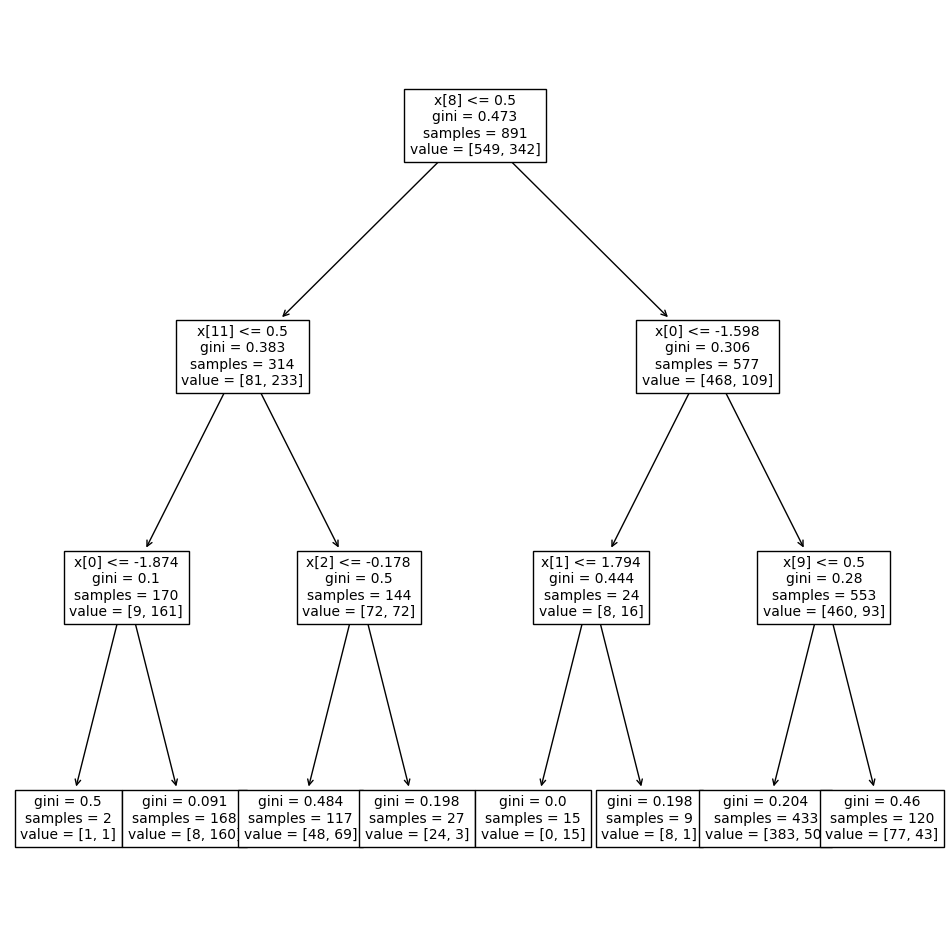

In [37]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(modeloDT, fontsize=10)
plt.show()

## Support Vector Machine

Suppoer Vector Machine, Máquina de vetores de suporte ou simplesmente SVM é a abordagem popular de classificação baseado em um conjunto de separadores lineares, a matemática por trás é bem interessante e você pode [conhecer mais por aqui](https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989). Porém, hoje, focaremos apenas na implementação.

Procure pela implementação `SVC` do skelearn, que é a implementação de SVM aplicada a problemas de classificação e aplique a nossa base `Titanic`. Procure também entender os parametros `C` e `kernel` do modelo, brinque um pouco com eles e teste diferentes valores, o que você percebe no resultado?


In [38]:
#Questão 14
#Use o SVM (SVC - modeloSVC). Para prever os valores. Troque o `Kernel` do modelo e o hiperparâmetro C.
#Será que você consegue obter valores melhores do que os já alcançados até agora?

from sklearn.svm import SVC #importando o modelo
modeloSVC = SVC(kernel="rbf", C=0.1) #criando o modelo
modeloSVC.fit(df_treino_X, df_treino_y)
y_predSVC = modeloSVC.predict(df_teste_X)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
print("Acurácia do modelo SVC é: {}".format(metrics.accuracy_score(df_teste_y, y_predSVC).round(8)))

Acurácia do modelo SVC é: 0.97607656


* **Comentário:** O SVC está acertando 97% dos casos.

In [40]:
#Questão 15
#Use o Naive Bayes (modeloNB).
#Será que você consegue obter valores melhores do que os já alcançados até agora?

from sklearn.naive_bayes import GaussianNB #importando o modelo
modeloNB = GaussianNB() #criando o modelo
modeloNB.fit(df_treino_X, df_treino_y)
y_predNB = modeloNB.predict(df_teste_X)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
print("Acurácia do modelo Naive Bayes é: {}".format(metrics.accuracy_score(df_teste_y, y_predNB).round(8)))

Acurácia do modelo Naive Bayes é: 0.71052632


* **Comentário:** O Naive Bayes está acertando 71% dos casos.

In [51]:
#Questão 16
#O bom e conhecido KNN! Use o KNN (modeloSVC). Para prever os valores.
#Será que você consegue obter valores melhores do que os já alcançados até agora?
#se você usar n_neighbors=2, o resultado melhora ou piora? E se for n_neighbors=10?

from sklearn.neighbors import KNeighborsClassifier #importando o modelo
modeloKNN = KNeighborsClassifier(n_neighbors=10) #criando o modelo que considera 10 vizinhos próximos na decisão
modeloKNN.fit(df_treino_X, df_treino_y)
y_predKNN = modeloKNN.predict(df_teste_X)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [52]:
print("Acurácia do modelo KNN é: {}".format(metrics.accuracy_score(df_teste_y, y_predKNN).round(8)))

Acurácia do modelo KNN é: 0.88995215


* **Comentário:** Testei com n_neighbors=2, porem ficou muito melhor com
n_neighbors=10, com 88% de acerto dos casos.

In [54]:
#Questão 17
#Rode o otimizador SGD
#se você rodar o modelo mais de uma vez, sem alterar nada, o resultado final muda?
#Como saber qual o melhor resultado podemos obter com esse modelo?

from sklearn.linear_model import SGDClassifier #importando o modelo
modeloSGD = SGDClassifier() #criando o modelo
modeloSGD.fit(df_treino_X,df_treino_y)
y_predSGD = modeloSGD.predict(df_teste_X)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
print("Acurácia do modelo SGD é: {}".format(metrics.accuracy_score(df_teste_y, y_predSGD).round(8)))

Acurácia do modelo SGD é: 0.83732057


* **Comentário:** O SGD está acertando 83% dos casos.

* **Comentário:** Ao rodar o resultado mais uma vez, percebi que ....

In [56]:
#Questão 18
#Rode o otimizador RandomForest
#se você rodar o modelo mais de uma vez, sem alterar nada, o resultado final muda?
#Como saber qual o melhor resultado podemos obter com esse modelo?
#se alterarmos o valor de n_estimators e min_samples_leaf, os resultados mudam?

from sklearn.ensemble import RandomForestClassifier #importando o modelo
modeloRF = RandomForestClassifier(n_estimators=100, min_samples_leaf=2) #criando o modelo
modeloRF.fit(df_treino_X,df_treino_y)
y_predRF = modeloRF.predict(df_teste_X)

<ipython-input-56-a44bdbcff02d>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modeloRF.fit(df_treino_X,df_treino_y)


In [58]:
print("Acurácia do modelo Random Forest é: {}".format(metrics.accuracy_score(df_teste_y, y_predRF).round(8)))

Acurácia do modelo Random Forest é: 0.86842105


* **Comentário:** Random Forest está acertando 86% dos casos.

In [ ]:
#Questão 19
#Qual modelo entregou a maior acurácia?

* **Comentário:** O modelo com melhor resultado de acertos foi o SVC!!